In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [3]:
matplotlib.rc("font", family = "Malgun Gothic")

In [4]:
df_raw = pd.read_csv(r"Card_Spanding_cl5.csv", engine="python", encoding='utf-8-sig')
df_raw.head()

,사용일자,year,month,day,date,weekdays_num,weekdays,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드
0,20180409,2018,4,9,2018-04-09,2,Mon,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",의료기관,남성,50,5,512,2210348,4317.085938,96,life,1
1,20190131,2019,1,31,2019-01-31,5,Thu,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,45,4,19828,1603806,80.8859189,171,oil,1
2,20190228,2019,2,28,2019-02-28,5,Thu,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,45,4,20082,1586069,78.9796335,173,oil,1
3,20190131,2019,1,31,2019-01-31,5,Thu,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,40,4,14130,1132057,80.11726822,170,oil,1
4,20190228,2019,2,28,2019-02-28,5,Thu,노원구,"상계6,7동","노원구 상계6,7동",연료판매,남성,50,5,9732,886578,91.09926017,174,oil,1


In [5]:
df_raw1 = df_raw[df_raw["신용카드"] ==1]
df_raw1.head()

,사용일자,year,month,day,date,weekdays_num,weekdays,구,소비처,주소,소비처업종,성별,연령,age_group,사용횟수,사용금액,1회평균사용금액,사용카드,card_category,신용카드
0,20180409,2018,4,9,2018-04-09,2,Mon,종로구,"종로1,2,3,4가동","종로구 종로1,2,3,4가동",의료기관,남성,50,5,512,2210348,4317.085938,96,life,1
1,20190131,2019,1,31,2019-01-31,5,Thu,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,45,4,19828,1603806,80.8859189,171,oil,1
2,20190228,2019,2,28,2019-02-28,5,Thu,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,45,4,20082,1586069,78.9796335,173,oil,1
3,20190131,2019,1,31,2019-01-31,5,Thu,노원구,"상계6,7동","노원구 상계6,7동",연료판매,여성,40,4,14130,1132057,80.11726822,170,oil,1
4,20190228,2019,2,28,2019-02-28,5,Thu,노원구,"상계6,7동","노원구 상계6,7동",연료판매,남성,50,5,9732,886578,91.09926017,174,oil,1


In [6]:
weekdays_spending = df_raw1.groupby(["weekdays"])["사용금액"].sum()
weekdays_spending_df = pd.DataFrame(weekdays_spending).reset_index()

In [7]:
weekdays_spending_df

,weekdays,사용금액
0,Fri,37989413
1,Mon,36957148
2,Sat,38030814
3,Sun,28983393
4,Thu,42456882
5,Tue,35409616
6,Wed,33395758


<BarContainer object of 7 artists>

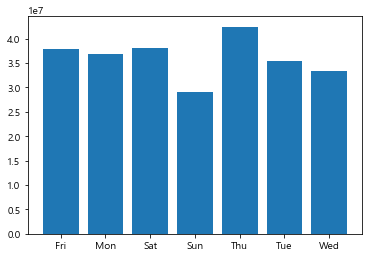

In [8]:
# 전체 신용카드 요일별 사용 금액
plt.bar(weekdays_spending_df.weekdays, weekdays_spending_df.사용금액)


<BarContainer object of 7 artists>

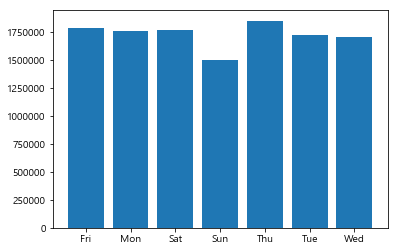

In [9]:
weekdays_spending = df_raw1.groupby(["weekdays"])["사용횟수"].sum()
weekdays_spending_df = pd.DataFrame(weekdays_spending).reset_index()

# 전체 신용카드 요일별 사용 횟수
plt.bar(weekdays_spending_df.weekdays, weekdays_spending_df.사용횟수)

# 20대 특성

<BarContainer object of 7 artists>

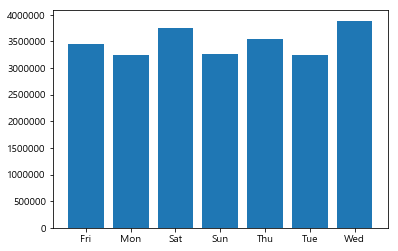

In [10]:
# 20대들의 요일별 사용 금액
twenty = df_raw1[df_raw1["age_group"]==2]
df_date_twenty = twenty.groupby(["weekdays"])['사용금액'].sum()
df_date_twenty_weekdays = pd.DataFrame(df_date_twenty).reset_index()
plt.bar(df_date_twenty_weekdays.weekdays, df_date_twenty_weekdays.사용금액)


<BarContainer object of 7 artists>

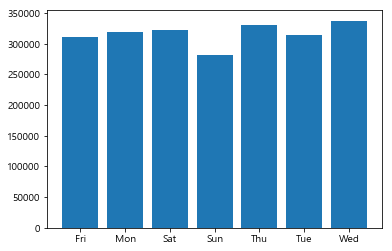

In [11]:
# 20대들의 요일별 사용 횟수`
twenty = df_raw1[df_raw1["age_group"]==2]
df_date_twenty = twenty.groupby(["weekdays"])['사용횟수'].sum()
df_date_twenty_weekdays = pd.DataFrame(df_date_twenty).reset_index()
plt.bar(df_date_twenty_weekdays.weekdays, df_date_twenty_weekdays.사용횟수)


In [18]:
twenty["소비처업종"].unique()

array(['유통업', '서적문구', '신변잡화', '의료기관', '가전', '의복', '보건위생', '자동차판매', '주방용품',
       '광학제품', '직물', '사무통신', '레저업소', '수리서비스', '가구', '자동차정비', '전기', '요식업소',
       '연료판매', '문화취미', '음료식품'], dtype=object)

<BarContainer object of 7 artists>

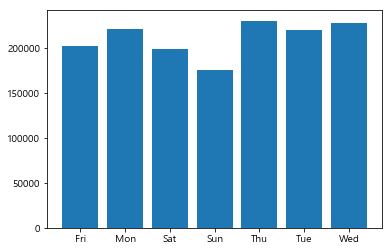

In [25]:
twenty
df_date_twenty_up = twenty[twenty["소비처업종"] =="유통업"].groupby(["weekdays","소비처업종"])['사용횟수'].sum()
df_date_twenty_weekdays_up = pd.DataFrame(df_date_twenty_up).reset_index()
plt.bar(df_date_twenty_weekdays_up.weekdays, df_date_twenty_weekdays_up.사용횟수)


<BarContainer object of 7 artists>

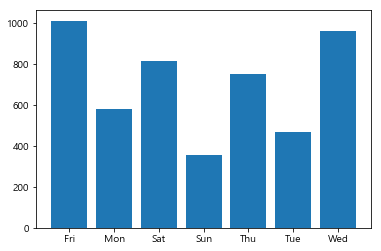

In [27]:
twenty
df_date_twenty_up = twenty[twenty["소비처업종"] =="요식업소"].groupby(["weekdays","소비처업종"])['사용횟수'].sum()
df_date_twenty_weekdays_up = pd.DataFrame(df_date_twenty_up).reset_index()
plt.bar(df_date_twenty_weekdays_up.weekdays, df_date_twenty_weekdays_up.사용횟수)


<BarContainer object of 7 artists>

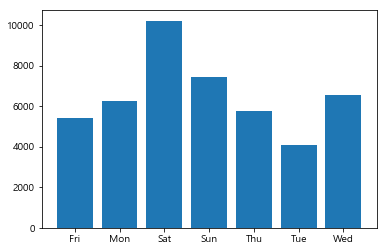

In [28]:
twenty
df_date_twenty_up = twenty[twenty["소비처업종"] =="의복"].groupby(["weekdays","소비처업종"])['사용횟수'].sum()
df_date_twenty_weekdays_up = pd.DataFrame(df_date_twenty_up).reset_index()
plt.bar(df_date_twenty_weekdays_up.weekdays, df_date_twenty_weekdays_up.사용횟수)


<BarContainer object of 7 artists>

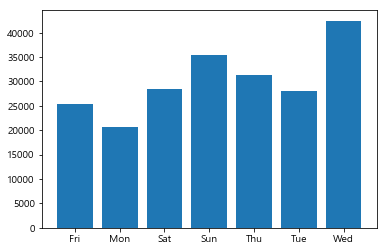

In [31]:
twenty
df_date_twenty_up = twenty[twenty["소비처업종"] =="서적문구"].groupby(["weekdays","소비처업종"])['사용횟수'].sum()
df_date_twenty_weekdays_up = pd.DataFrame(df_date_twenty_up).reset_index()
plt.bar(df_date_twenty_weekdays_up.weekdays, df_date_twenty_weekdays_up.사용횟수)


<BarContainer object of 7 artists>

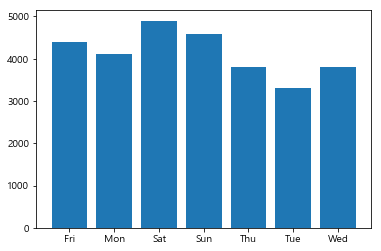

In [32]:
twenty
df_date_twenty_up = twenty[twenty["소비처업종"] =="신변잡화"].groupby(["weekdays","소비처업종"])['사용횟수'].sum()
df_date_twenty_weekdays_up = pd.DataFrame(df_date_twenty_up).reset_index()
plt.bar(df_date_twenty_weekdays_up.weekdays, df_date_twenty_weekdays_up.사용횟수)


<BarContainer object of 7 artists>

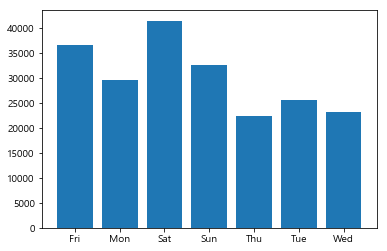

In [33]:
twenty
df_date_twenty_up = twenty[twenty["소비처업종"] =="레저업소"].groupby(["weekdays","소비처업종"])['사용횟수'].sum()
df_date_twenty_weekdays_up = pd.DataFrame(df_date_twenty_up).reset_index()
plt.bar(df_date_twenty_weekdays_up.weekdays, df_date_twenty_weekdays_up.사용횟수)


In [29]:
twenty["소비처업종"].unique()

array(['유통업', '서적문구', '신변잡화', '의료기관', '가전', '의복', '보건위생', '자동차판매', '주방용품',
       '광학제품', '직물', '사무통신', '레저업소', '수리서비스', '가구', '자동차정비', '전기', '요식업소',
       '연료판매', '문화취미', '음료식품'], dtype=object)

<BarContainer object of 7 artists>

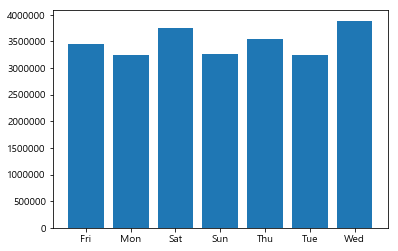

In [12]:
thirty = df_raw1[df_raw1["age_group"]==3]
df_date_thirty  = twenty.groupby(["weekdays"])['사용금액'].sum()
df_date_thirty_weekdays = pd.DataFrame(df_date_thirty).reset_index()
plt.bar(df_date_thirty_weekdays.weekdays, df_date_thirty_weekdays.사용금액)
